# Binary Classification of Cats and Dogs Images

## Preprocessing

In [74]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Importing data
ds_train = image_dataset_from_directory(
    'train',
    labels='inferred',
    label_mode = 'binary',
    interpolation='nearest',
    image_size = [128,128],
    batch_size=32,
)

ds_valid = image_dataset_from_directory(
    'test',
    labels='inferred',
    label_mode = 'binary',
    interpolation='nearest',
    image_size = [128,128],
    batch_size=32 
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


### Visualization

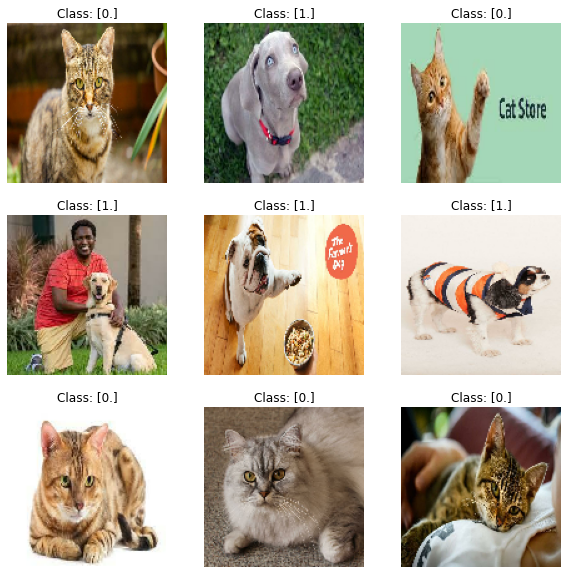

In [75]:
import matplotlib.pyplot as plt

# Selecting images and their respective labels
for images,labels in ds_train.take(1):

    # Creating figure of 10x10 (inches)
    plt.figure(figsize=(10,10))

    # Itering through images and plotting them
    ## uint8 ensures treatment as 8-bit integers
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f"Class: {labels[i].numpy()}")
        plt.axis('off')

    plt.show()



## Data Preparation

In [76]:
# Defining function for treating images as float data
def convert_to_float(image,label):
    image = tf.image.convert_image_dtype(image,dtype=tf.float32)
    return image,label

# Optimizing CPU usage
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Converting images
## Storing data in cache memory
### Optimizing data availabilty
ds_train = (
    ds_train.map(convert_to_float).cache().prefetch(buffer_size = AUTOTUNE)
)

ds_valid = (
    ds_valid.map(convert_to_float).cache().prefetch(buffer_size = AUTOTUNE)
)

## Architecture of the Convolutional Neural Network

In [77]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from keras.optimizers import Adam

# Defining the model
model = Sequential()

# Defining convolutional layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64, (4,4), activation='relu'))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(128, (5,5), activation='relu'))
model.add(LeakyReLU(alpha=0.05))

# Adding a layer for reducing spatial dimensions
model.add(MaxPooling2D(pool_size=(3,3)))

# Flatten for transitioning from size dimensions to fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 leaky_re_lu_59 (LeakyReLU)  (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 42, 42, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 39, 39, 64)        32832     
                                                                 
 leaky_re_lu_60 (LeakyReLU)  (None, 39, 39, 64)        0         
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                               

## Model Compilation

In this section, the model is compiled using the Adam optimizer for it being based on stochastic gradient descent algorithms, while its loss function is set to follow a binary crossentropy algorithm, which is optimal for binary classification task. Finally, in order to mensurate the model's accuracy, binary accuracy metric is implemented also for it being optimal for the present task.

In [78]:
# Setting seeds
tf.random.set_seed(1)
np.random.seed(1)

# Compiling model
model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics = ['binary_accuracy']
)

# Fitting model
history = model.fit(
    ds_train,
    validation_data = ds_valid,
    epochs = 20,
    verbose=1
)

Epoch 1/20
18/18 [==============================] - 7s 327ms/step - loss: 0.6954 - binary_accuracy: 0.5189 - val_loss: 0.6901 - val_binary_accuracy: 0.5714
Epoch 2/20
18/18 [==============================] - 5s 291ms/step - loss: 0.6918 - binary_accuracy: 0.5260 - val_loss: 0.6890 - val_binary_accuracy: 0.5214
Epoch 3/20
18/18 [==============================] - 5s 290ms/step - loss: 0.6846 - binary_accuracy: 0.5548 - val_loss: 0.6890 - val_binary_accuracy: 0.5214
Epoch 4/20
18/18 [==============================] - 5s 298ms/step - loss: 0.6810 - binary_accuracy: 0.5548 - val_loss: 0.6859 - val_binary_accuracy: 0.5571
Epoch 5/20
18/18 [==============================] - 5s 293ms/step - loss: 0.6739 - binary_accuracy: 0.6212 - val_loss: 0.6830 - val_binary_accuracy: 0.5500
Epoch 6/20
18/18 [==============================] - 5s 289ms/step - loss: 0.6689 - binary_accuracy: 0.6158 - val_loss: 0.6817 - val_binary_accuracy: 0.5500
Epoch 7/20
18/18 [==============================] - 5s 295ms/ste

## Visualizing Results

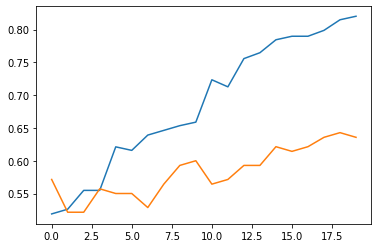

In [79]:
# Gráfico para visualizar os erros e accuracy
history.history.keys()
#evolução do erro, azul
plt.plot(history.history['binary_accuracy'])
#performance da rede
plt.plot(history.history['val_binary_accuracy'])

In [80]:
test_loss, test_acc = model.evaluate(ds_valid, verbose=1)

1/5 [=====>........................] - ETA: 0s - loss: 0.7972 - binary_accuracy: 0.4688

5/5 [==============================] - 0s 54ms/step - loss: 0.6702 - binary_accuracy: 0.6357


In [81]:
print(f'Acurácia: {test_acc} - Perda: {test_loss}')

Acurácia: 0.6357142925262451 - Perda: 0.670208215713501
